**First name + last name: Niels Coopmans**

**Group:EA02**

# Lab 3 Telecommunications: Digital Modulation

During this lab, the aim is to complete the missing code and necessary conclusions. Jupyter notebook consists of several cells that you can edit by clicking on them twice. This is, for example, a ‘Markdown’ cell where simple text can be added in combination with

$LaTeX formulas$.

HTML code can also be added. Within these cells, simple conclusions can be written in a neat way. Don’t forget to add your name and group at the top of this cell.

In [37]:
# This is a 'code' cell, in these you can write your python code.

# Analogue vs Digital Modulation

## Which type of input and output signal (analog/digital) corresponds to digital and analog modulation and demodulation? Fill in the table below. Explain where necessary.

| Signal type | Modulation and direction | Signal type |explaination|
|:-----------:|:-----------------------:|:-----------:|:-----------:|
|Digital|  $\rightarrow$ Digital modulation $\rightarrow$  |Analog|Digital information is used to modulate a carrier wave (analog), creating a signal suitable for transmission.|
|Analog|  $\leftarrow$ Demodulation $\leftarrow$           |Digital|The received analog signal is demodulated to recover the original digital information.|
|Analog|  $\rightarrow$ Analog modulation $\rightarrow$   |Analog|An analog information signal modulates a carrier wave (analog), resulting in another analog signal for transmission.|
|Analog|  $\leftarrow$ Demodulation $\leftarrow$           |Analog|This is correct. The received analog signal is demodulated to recover the original analog information.|

# Digital Modulation Techniques

The techniques covered in the course are M-ASK, M-PSK, M-QAM, and M-FSK, where the prefix M refers to the number of possible values that the amplitude and/or phase can take on. The dependence of amplitude and/or phase on M determines what the constellation diagram looks like.

**Provide a figure of the (theoretical/perfect) constellation diagrams for the following digital modulation techniques: 4-ASK, 2-PSK (also known as BPSK), and 8-QAM. If necessary, use the formulas in the theory course. Label the axes in each constellation diagram correctly, based on the figures in the course chapter on digital modulation.**

|                          4-ASK                        |                         2-PSK or BPSK                       |                          8-QAM                        |
:-------------------------------------------------------:|:-----------------------------------------------------------:|:-----------------------------------------------------:|
<img src="Figuren_notebook/4-ASK.jpg" width="200"> | <img src="Figuren_notebook/BPSK.png" width="200"> | <img src="Figuren_notebook/8-QAM.png" width="200"> |


# Task 1: 4-QAM/QPSK modulation

During this lab, a number of functions need to be completed to enable 4-QAM modulation and demodulation. These functions are also used later in Exercise 2. The figure below provides a general overview of the different steps involved in this exercise. First, a bitstream is created which can be seen as the data to be transmitted. This is followed by digital modulation of this bitstream and the addition of Additive White Gaussian Noise (AWGN). This baseband signal is then converted to a passband signal so that it can be 'carried' over a medium using a carrier. For simplicity, perfect synchronization and an ideal channel are assumed (no channel attenuation and multipath effects). At the receiver side, demodulation with demapping follows to retrieve the transmitted bitstream. From this, a number of communication properties can be obtained, such as BER.

<img src="Figuren_notebook/overviewLabo.PNG" width="800">


## Step 1: Importing the Python libraries to be used

All necessary libraries are already imported below. These may need to be installed within the Anaconda environment to be used. This can be done by opening the Anaconda Prompt and entering the following commands.

*pip install numpy*

*pip install matplotlib*

*pip install scipy*

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

## Step 2: Creating the bitstream

**Complete the function below to create a bitstream consisting of random bits, using the np.random.randint() function.** The bitstream consists of a given number of symbols (*n_symbols*), which in turn consist of a given number of bits (*n_bits_per_symbol*). Combinations of bits thus form a symbol, e.g. "00", "01", "11", "10". The output should be a numpy array with 0's and 1's as integer values, e.g. [00011110].


In [39]:
# 1) Creation of the bitstream to be transmitted

def create_bitstream(n_symbols, n_bits_per_symbol):
    '''
    This function creates a bitstream consisting of a numpy array
        n_symbols: number of symbols to be transmitted
        n_bits_per_symbol: number of bits per symbol, the example above contains 2 bits per symbol
        return: bitstream: numpy array with 1's and 0's
    '''
    bitstream = np.random.randint(2, size=(n_symbols, n_bits_per_symbol))
    
    return bitstream

# Test the function
s = 3         # Number of symbols to be transmitted
bits_s = 2    # Number of bits per symbol

tx_bits_test = create_bitstream(s, bits_s)

print(f'Number of symbols to be transmitted: {s}')
print(f'Number of bits per symbol: {bits_s}')
print(f'\nGenerated bitstream: {tx_bits_test}')
print(f'Number of bits to be modulated: {np.size(tx_bits_test)}')


Number of symbols to be transmitted: 3
Number of bits per symbol: 2

Generated bitstream: [[1 1]
 [1 0]
 [1 1]]
Number of bits to be modulated: 6


Create a bitstream that can be used for 4-QAM (M = 4), consisting of 6 symbols. This will be used later in the code. Calculate the necessary number of bits per symbol if M is known. For example, BPSK contains 1 bit per symbol, QPSK contains 2 bits, 8-QAM contains 3 bits, 16-QAM contains 4 bits, 64-QAM contains 6 bits, etc.

In [40]:
# 2) Create an appropriate bitstream
def create_bitstream(n_symbols, n_bits_per_symbol):
  """
  This function creates a bitstream consisting of a numpy array.

  Args:
      n_symbols: Number of symbols to be transmitted.
      n_bits_per_symbol: Number of bits per symbol.

  Returns:
      bitstream: A numpy array with 1's and 0's representing the bitstream.
  """

  # Reshape the output of np.random.randint to create the bitstream
  bitstream = np.random.randint(2, size=(n_symbols, n_bits_per_symbol))

  return bitstream

s = 6
M = 4

bits_s = int(np.log2(M))
tx_bits = create_bitstream(s, bits_s)
print(f'Modulating bits:\n {tx_bits}')


Modulating bits:
 [[1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]]


## Step 3: Digital Modulation

After creating the desired bits to be sent, digital modulation follows, also called creating the complex envelope or baseband components. Below is a small repetition of the theory seen during the lectures. For more in-depth information, the theory course can be consulted.

### Creating the complex envelope (baseband components)

The complex envelope $g(t)$, also called the equivalent complex baseband representation of the passband signal $s(t)$, is a composition of the in-phase component $g_I(t)$ (the I-component) and the quadrature component $g_Q(t)$ (the Q-component).

$$g(t) = g_I(t) + j g_Q(t)$$

These are typically represented in the constellation diagram, as shown in the previously searched 4-ASK, 2-PSK and 8-QAM modulation techniques. These real and complex components of the baseband signal can also be described as follows:

$$R(t) = \sqrt{g_I(t)^2 + g_Q(t)^2}$$

$$\theta(t) = \rm{arctan}\frac{g_Q(t)}{g_I(t)}$$

$R(t)$ determines how the amplitude of the passband signal $s(t)$ changes over time and is therefore the amplitude modulation of $s(t)$ and $\theta(t)$ determines how the phase changes over time and is therefore the phase modulation of $s(t)$. This amplitude and phase modulation are applied to a carrier to switch to a practically usable analog signal.

**Complete the modulation dictionary based on Gray codes starting at (00, 01, ...) and fill in the functions below where necessary. Answer the accompanying question:**

**What is the difference between binary coding and Gray coding and why would you use Gray coding as constellation ordering instead of binary coding?**

Binary coding directly assigns a unique code (0s and 1s) to each data value. Gray coding, on the other hand, ensures that adjacent codewords differ by only one bit. This minimizes errors in digital modulation caused by noise or glitches. Since constellation points in modulation schemes often represent neighboring data values, Gray coding helps prevent transitions jumping to distant points due to bit flips, improving signal reliability.

**Explain what both functions below do. What is obtained using which information? Are these functions usable for all possible digital modulation orders?**

The two functions, ampl_fase_mapping and I_Q_generate, work together to convert a digital bitstream into a complex baseband representation suitable for modulation.

ampl_fase_mapping:
    Input: Takes the bitstream, modulation dictionary, number of symbols, and bits per symbol.
    Function: Maps each group of bits (representing a symbol) in the bitstream to its corresponding amplitude and phase values based on the provided modulation dictionary.
    Output: Returns a list of mapped symbols, where each symbol contains an amplitude-phase pair.

I_Q_generate:
    Input: Takes the list of mapped symbols (amplitude and phase pairs) generated by ampl_fase_mapping.
    Function: Converts each symbol's amplitude and phase information into its in-phase (I) and quadrature (Q) components, representing the complex baseband signal.
    Output: Returns a NumPy array containing the complex baseband representation (I/Q components) for each symbol.

Usability: These functions are not universally usable for all modulation schemes. They rely on a specific modulation dictionary format (amplitude-phase pairs). They might require modifications for other modulation types:

BPSK: Uses only phase information (dictionary would map bits to phase values).
Higher-order QAM: Uses both amplitude and phase variations (dictionary would map bit sequences to amplitude-phase pairs) and might require additional steps for normalization.

In [41]:
# Creation of Modulation dictionary
modulation_BPSK = { # Example for BPSK
    '0' : (1,0),
    '1' : (1,180),
    }

modulation_4QAM = {
    '00': (1, 45), 
    '01': (1, 135),
    '11': (-1, 135),
    '10': (-1, 45),
}

# Modulation functions
def ampl_fase_mapping(bitstream, modulation, n_symbols, bits_per_symb):
    """
    This function maps the bitstream symbols based on the provided modulation dictionary.
    Args:
        bitstream: The bitstream numpy array (0's and 1's).
        modulation: The modulation dictionary containing symbol mappings.
        n_symbols: Number of symbols in the bitstream.
        bits_per_symb: Number of bits per symbol.

    Returns:
        mapped: A list containing the mapped symbols (amplitude, phase) for each symbol in the bitstream.

    """
    #BPSK_mapped = [modulation[str(bit)] for bit in bitstream]
    mapped = list()
    for bit_index in range(0, bits_per_symb*n_symbols, bits_per_symb):
        symb_vect = modulation[str(bitstream[bit_index:(bit_index + bits_per_symb)]).strip('[').strip(']').replace(" ", "")]
        mapped.append(symb_vect)
    return mapped

def I_Q_generate(mapped_signal):
    """
    This function generates the I/Q components from the mapped symbols (amplitude and phase).

    Args:
        mapped_signal: A list containing mapped symbols (amplitude, phase) for each symbol.

    Returns:
        symbols: A NumPy array containing the complex baseband representation (I/Q components) for each symbol.
    """
    symbols = np.array([])
    for symbol in mapped_signal:
        symbol_complex = np.round(symbol[0]*(np.cos(np.deg2rad(symbol[1]))+1j*np.sin(np.deg2rad(symbol[1]))), 5)
        symbols = np.append(symbols, symbol_complex)  
    return symbols
# Example usage
tx_bits = np.array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0])
s = 5  # Number of symbols
bits_s = 2  # Number of bits per symbol
QPSK_mapped = ampl_fase_mapping(tx_bits, modulation_4QAM, s, bits_s)

QPSK_symbols = I_Q_generate(QPSK_mapped)

print(f'Mapped Symbols (amplitude, phase): {QPSK_mapped}')
print(f'I/Q components: {QPSK_symbols}')

Mapped Symbols (amplitude, phase): [(-1, 45), (1, 45), (-1, 135), (-1, 45), (-1, 45)]
I/Q components: [-0.70711-0.70711j  0.70711+0.70711j  0.70711-0.70711j -0.70711-0.70711j
 -0.70711-0.70711j]


### Plotting the constellation diagram

The following function can be used to plot the constellation diagram, along with the theoretical QPSK symbols. 
Check what this function does.



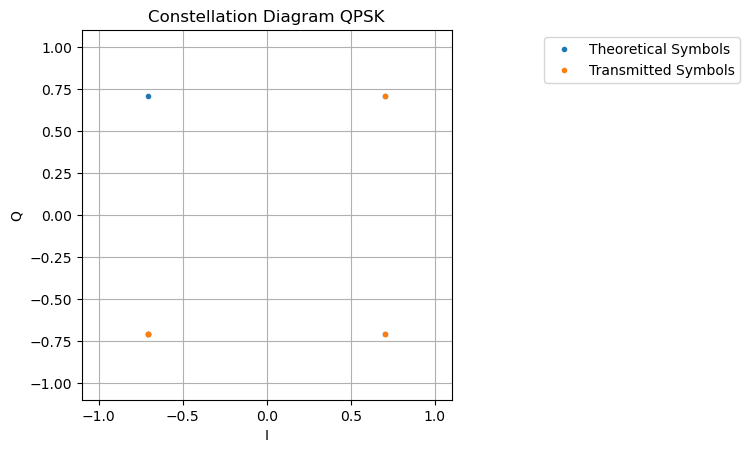

In [42]:
# Plots the constellation diagram of the created symbols

def plot_constel(QPSK_symbols, title, label, x_legend):
    """
    This function plots the constellation diagram for QPSK.
        QPSK_symbols: the symbols to be plotted on the constellation diagram
        title: title of the diagram
        label: label of the QPSK_symbols data
        x_legend: the x-position of the legend
    """
    # Theoretically possible symbols
    x_int = np.arange(0,4,1)
    x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
    x_radians = x_degrees*np.pi/180.0 # sin() and cos()
    x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # QPSK complex symbols
    # Plotting the symbols
    plt.plot(np.real(x_symbols), np.imag(x_symbols), '.', label='Theoretical Symbols')
    plt.plot(np.real(QPSK_symbols), np.imag(QPSK_symbols), '.', label=label)
    plt.title(title)
    plt.xlabel('I')
    plt.ylabel('Q')
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.gca().legend(bbox_to_anchor=(x_legend, 1))
    plt.show()
    
plot_constel(QPSK_symbols, 'Constellation Diagram QPSK', 'Transmitted Symbols', 1.8)


## Step 4: Adding AWGN

To simulate a physical system, Additive White Gaussian Noise (AWGN) is added to the signal. The noise affects both the phase and amplitude of the modulated signal.

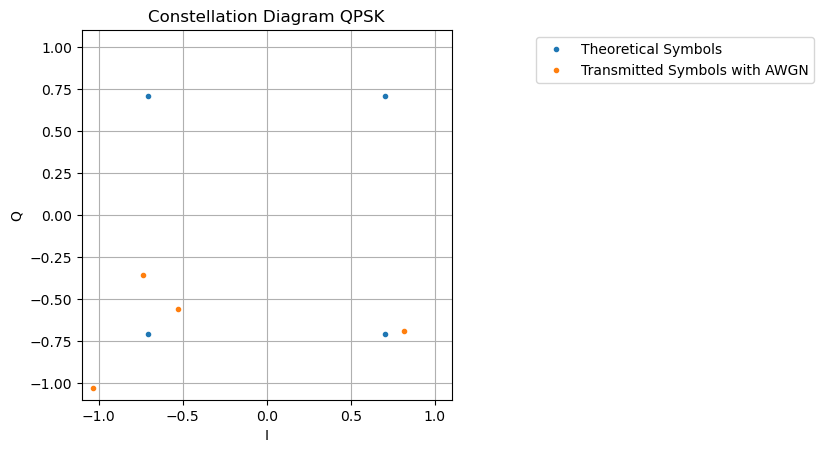

In [43]:
def add_AWGN(current_SNR, signal):
    """
    Add AWGN to the baseband symbols.
        current_SNR: SNR
        signal: the signal consisting of a numpy array with complex numbers as arguments
        return: the signal with added AWGN
    """
    noisePower = 10**(-current_SNR/20)
    noise = (noisePower)*1/np.sqrt(2)*(np.random.randn(len(signal))+1j*np.random.randn(len(signal)))
    y_AWGN = signal + noise 
    return y_AWGN

SNR = 10    # SNR in dB
QPSK_AWGN = add_AWGN(SNR, QPSK_symbols)

plot_constel(QPSK_AWGN, 'Constellation Diagram QPSK', 'Transmitted Symbols with AWGN', 2)


**Describe what the above code does and why it is relevant.**

This function simulates the addition of Additive White Gaussian Noise (AWGN) to a baseband signal. AWGN is a common channel impairment in communication systems.
This function helps simulate the effect of noise on the transmitted signal, allowing you to study its impact on performance metrics like Bit Error Rate (BER).
By analyzing the received signal with AWGN (QPSK_AWGN), you can assess the robustness of your modulation scheme and potentially design error correction techniques.

**What does $SNR$ mean and what is the difference with $E_b/N_0$? What is the unit of these parameters? Do we want these parameters to be as high as possible or rather as low as possible?** 
SNR (Signal-to-Noise Ratio) tells you how strong your signal is compared to the noise, measured in decibels (dB).  A higher SNR means a clearer signal.  Eb/No (Energy per Bit to Noise Power Spectral Density) is similar but considers the energy per bit of data transmitted in relation to noise power, with no units.  Both SNR and Eb/No should be as high as possible for clear communication.

## Step 5: Create the passband signal

The previously mentioned carrier can be represented as a pure sinusoidal function with frequency fc. The phase and amplitude of this carrier are adjusted according to the transmitted symbols and their corresponding digital modulation. The formula below shows the conversion of digital modulation to an analog signal consisting of a carrier that is influenced by the digital modulation or in other words the baseband signal is converted into a passband signal.

$$s(t) = R(t) \cdot \rm{cos}(2 \, \pi \, f_c \, t + \theta(t)) = g_I(t) \cdot \rm{cos}(2 \, \pi \, f_c \, t) - g_Q(t) \cdot \rm{sin}(2 \, \pi \,  f_c \, t)$$

![Overview](Figuren_notebook/overview_modulatie.png)

**Fill in the code below where necessary using the figure and information above.**


The in-phase component: [-0.70711  0.70711  0.70711 -0.70711 -0.70711]
The quadrature component: [-0.70711  0.70711 -0.70711 -0.70711 -0.70711]
The in-phase component: [-0.52807822  1.16076047  0.81457536 -0.73367578 -1.03463288]
The quadrature component: [-0.56269234  0.5818862  -0.68839384 -0.35622509 -1.03136859]


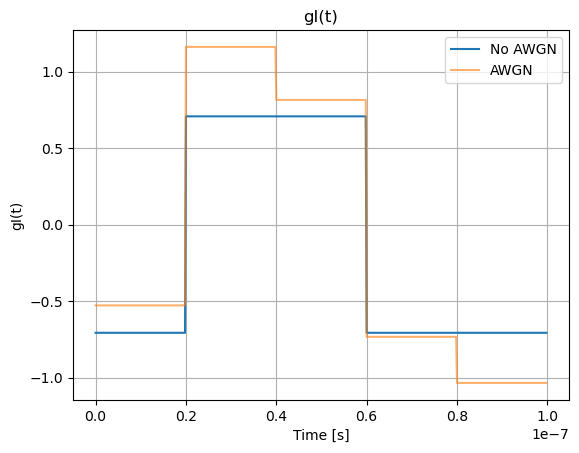

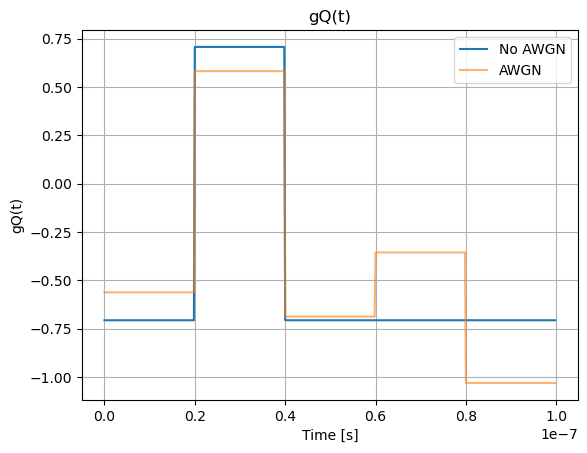

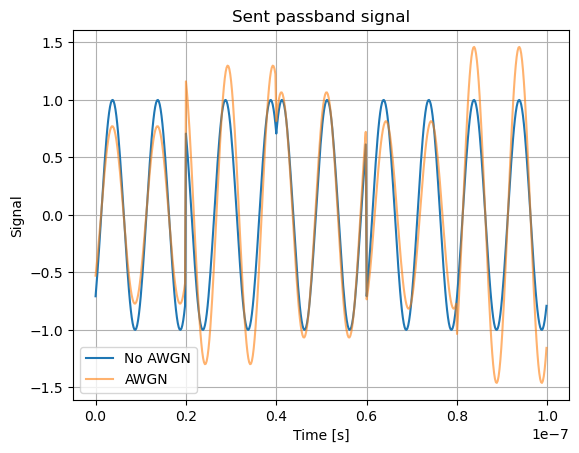

In [44]:
# Create the carrier frequency
n_periods = 2                # number of carrier periods needed per symbol
n_samples_per_period = 50    # number of samples per carrier period
fc = 100e6               # frequency of the carrier wave

def create_passband(n_periods, n_samples_per_period, fc, QPSK_symbols):
    """
    This function creates the passband signal.
        n_periods: number of carrier periods used per symbol
        n_samples_per_period: number of samples per carrier period
        fc: frequency of the carrier
        QPSK_symbols: the symbols (numpy array consisting of complex numbers as arguments),
                      of which the passband signal needs to be created
        return passband: the passband signal as a function of time t
               t: time
               g_I_t: the in-phase component as a function of time t
               g_Q_t: the quadrature component as a function of time t
    """
    t = np.arange(0,n_periods*(1/fc)*s, 1/(fc*n_samples_per_period))

    g_I = np.real(QPSK_symbols)
    g_Q = np.imag(QPSK_symbols)
    print(f'The in-phase component: {g_I}')
    print(f'The quadrature component: {g_Q}')

    # Repeat the g_I and g_Q symbols over the length of a carrier symbol
    g_I_t = np.repeat(g_I,n_samples_per_period*n_periods)
    g_Q_t = np.repeat(g_Q,n_samples_per_period*n_periods)

    # Check if t is equal in size to g_I_t and g_Q_t, since rounding errors can result in an extra sample
    # (e.g., when creating t)
    if np.size(t)>np.size(g_I_t):
            n_samples = np.size(t)-np.size(g_I_t)
            t = t[:-n_samples]
    elif np.size(t)<np.size(g_I_t):
            n_samples = np.size(g_I_t)-np.size(t)
            g_I_t = g_I_t[:-n_samples]
            g_Q_t = g_Q_t[:-n_samples]

    # Create the passband signal
    passband = g_I_t * np.cos(2*np.pi*fc*t) - g_Q_t * np.sin(2*np.pi*fc*t)

    return passband, t, g_I_t, g_Q_t

# Create the passband signal without added AWGN
passband, t, g_I_t, g_Q_t = create_passband(n_periods, n_samples_per_period, fc, QPSK_symbols)

# Create the passband signal with added AWGN
passband_noise, t_noise, g_I_t_noise, g_Q_t_noise = create_passband(n_periods, n_samples_per_period, fc, QPSK_AWGN)

# Plot g_I(t), with and without AWGN
plt.plot(t, g_I_t, label='No AWGN')
plt.plot(t_noise, g_I_t_noise, label='AWGN', alpha=0.6)
plt.title('gI(t)')
plt.ylabel('gI(t)')
plt.xlabel('Time [s]')
plt.legend()
plt.grid()
plt.show()

# Plot g_Q(t), with and without AWGN
plt.plot(t, g_Q_t, label='No AWGN')
plt.plot(t_noise, g_Q_t_noise, label='AWGN', alpha=0.6)
plt.title('gQ(t)')
plt.ylabel('gQ(t)')
plt.xlabel('Time [s]')
plt.legend()
plt.grid()
plt.show()      

# Plot the passband signal, with and without AWGN
plt.plot(t, passband, label='No AWGN')
plt.plot(t_noise, passband_noise, label='AWGN', alpha=0.6)
plt.title('Sent passband signal')
plt.ylabel('Signal')
plt.xlabel('Time [s]')
plt.legend()
plt.grid()


**Conclude on these results. What do you see?**

The plots show the I and Q components as constant value sequences switching between positive and negative values. The passband signal would be a continuous waveform with transitions corresponding to the symbol sequence. AWGN adds "noise" to the plots. Its like static on a TV - that's what the AWGN plots would look like compared to the clean, defined plots without AWGN. The noise makes it harder to see the transitions between symbols in the signal.

## Step 6: Demodulation

At the receiver side, we want to retrieve the originally transmitted bits. For this, demodulation is necessary, which converts the passband signal to a baseband signal, as shown in the figure below, followed by demapping to extract the transmitted bits from the baseband signal.

![Overview](Figuren_notebook/overview_demodulatie.png)

In this example, we assume perfect synchronization and no channel attenuation. However, in reality, synchronization is required in combination with a filter to counteract intersymbol interference.

**What are the two types of synchronization that need to be applied in reality? Explain why these synchronizations are necessary. What would go wrong if these synchronizations were not done?**

Carrier Synchronization: This aligns the receiver's internal carrier oscillator with the frequency and phase of the incoming carrier signal.

 Without this, the demodulated signal would be distorted and difficult to interpret.

Symbol Synchronization: This aligns the receiver's sampling clock with the rate at which symbols are transmitted. Inaccuracy here can cause intersymbol interference (ISI), where overlapping tails of adjacent symbols bleed into each other, corrupting the recovered data.


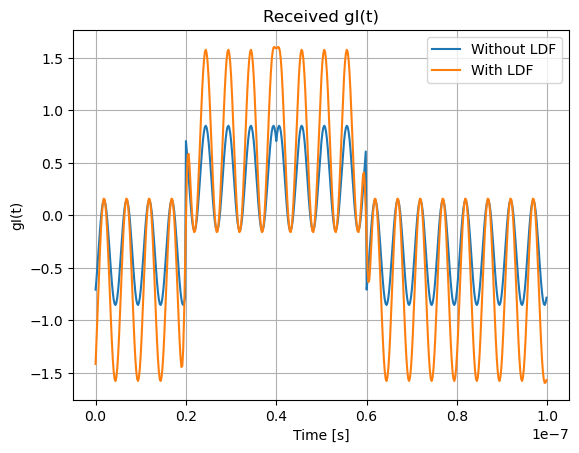

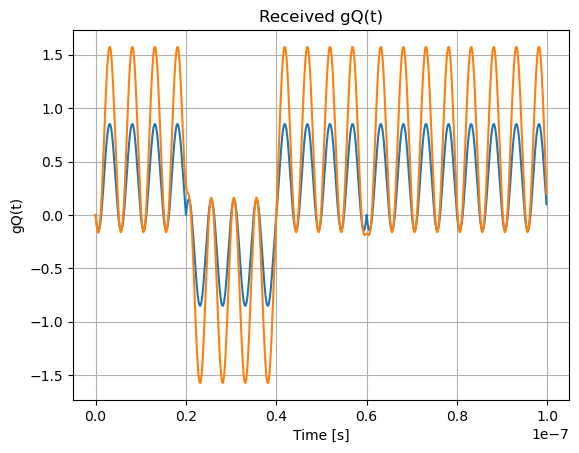

The received in-phase component: [-1.32238547  1.32238547  1.32238547 -1.32238547 -1.32238547]
The received quadrature component: [ 0.09183453 -0.09183453  0.09183453  0.09183453  0.09183453]


In [45]:
# Inserting LDF
def LDF(x, typeF, order, cutoff, fs):
    """
    Function to apply a filter
        x: input signal
        typeF: filter type ('bandpass', 'lowpass', 'highpass', 'bandstop')
        order: length/order of the filter
        cutoff: cutoff frequency
        fs: sample frequency
        return xf: the filtered signal
    """
    # Use signal.firwin to generate the filter coefficients
    b = signal.firwin(order, cutoff, pass_zero=typeF, fs=fs)
    
    # Use signal.filtfilt to filter x + add amplification factor 2
    xf = 2*signal.filtfilt(b, 1 , x)
    
    return xf


# Select the appropriate I and Q value
def select_I_Q_value(x, n_periods, n_samples_per_period, n_symbols):
    """
    Select the I and Q value from the obtained signals after LDF. This is simplified here by taking a value 
    in the middle of a carrier symbol. There are optimizations possible, but for the simplicity of the lab, this is 
    not done.
        x: the signal after filtering
        n_periods: number of periods of the carrier signal needed for 1 symbol (see earlier)
        n_sampels_per_period: number of samples needed per period of the carrier signal
        n_symbols: number of transmitted symbols
        return val: numpy array with I and Q values
    """
    tot_samp_periode = n_periods*n_samples_per_period
    start_index = np.round(tot_samp_periode/2, 0)
    indexes = np.arange(int(start_index), tot_samp_periode*n_symbols, tot_samp_periode)
    val = x[indexes]
    return val

fs = fc*n_samples_per_period

# TODO: Perform demodulation as shown in the figure above
g_I_rx = passband * np.cos(2 * np.pi * fc * t)
g_Q_rx = passband * np.sin(2 * np.pi * fc * t)

# TODO: apply the filter to the signal
g_I_rx_filtered = LDF(g_I_rx, 'lowpass', order=8, cutoff=fc/2, fs=fs)
g_Q_rx_filtered = LDF(g_Q_rx, 'lowpass', order=8, cutoff=fc/2, fs=fs)


# Plot the obtained signals
plt.plot(t, g_I_rx, label= 'Without LDF')
plt.plot(t, g_I_rx_filtered, label= 'With LDF')
plt.title('Received gI(t)')
plt.ylabel('gI(t)')
plt.xlabel('Time [s]')
plt.legend()
plt.grid()
plt.show()

plt.plot(t, g_Q_rx, label= 'Without LDF')
plt.plot(t, g_Q_rx_filtered, label= 'With LDF')
plt.title('Received gQ(t)')
plt.ylabel('gQ(t)')
plt.xlabel('Time [s]')
plt.grid()
plt.show()

# Select 1 I and Q value. 
I = select_I_Q_value(g_I_rx_filtered, n_periods, n_samples_per_period, s)
Q = select_I_Q_value(g_Q_rx_filtered, n_periods, n_samples_per_period, s)
print(f'The received in-phase component: {I}')
print(f'The received quadrature component: {Q}')


**What do you see in the above figures?**

They show that LDF high-frequency carrier and isolate the baseband signal containing the data from the received passband signal.

**Explain the chosen values of the low-pass filter. Why is the low-pass filter necessary?**

The specific order (8) is chosen to provide a reasonable balance between filter complexity and sharpness of the cutoff frequency transition. The low-pass filter is necessary to remove the high-frequency carrier and isolate the baseband signal containing the data from the received passband signal.


### Demapping

Since the I and Q values are known, we obtain information about the symbols. We can reconstruct these received symbols as the sent version (which consists of a numpy array of complex values). From this, we can extract the sent bits using demapping. The applied demapping method is very simple and only works for QPSK. Other possibilities, more optimal systems also exist. This is just one of the possible solutions. **Complete the code where necessary.**


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The in-phase component: [[-1.32238547]
 [ 1.32238547]
 [ 1.32238547]
 [-1.32238547]
 [-1.32238547]]
The quadrature component: [[ 0.09183453]
 [-0.09183453]
 [ 0.09183453]
 [ 0.09183453]
 [ 0.09183453]]


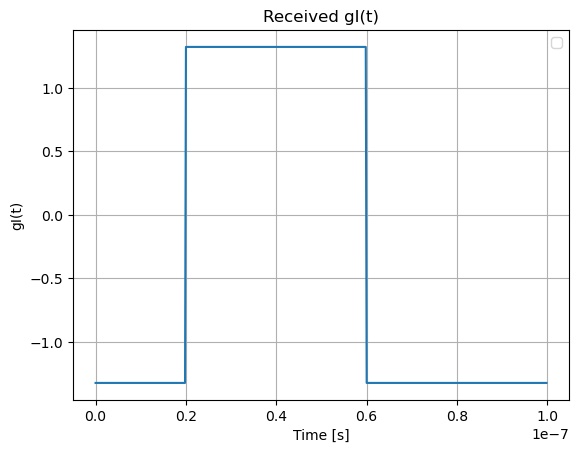

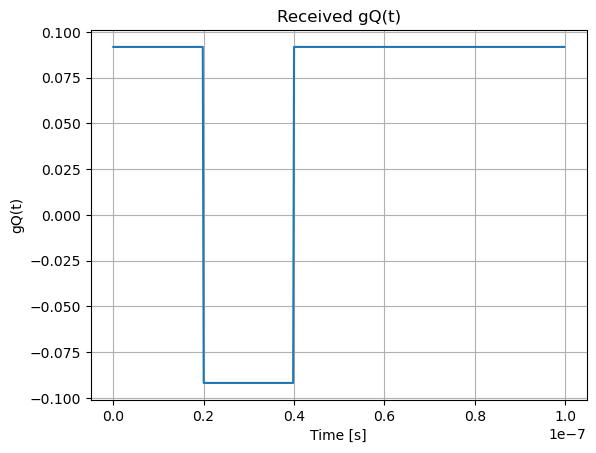

In [46]:
# Convert back to symbols expressed as complex values in an array
rx_symbols = np.column_stack((I, Q))
rx_symbols = rx_symbols.astype(complex)
rx_symbols = rx_symbols[:,:1] + rx_symbols[:,1:]*1j

passband, t, g_I_t, g_Q_t = create_passband(n_periods, n_samples_per_period, fc, rx_symbols)

# Plot the obtained signals
plt.plot(t, g_I_t,)
plt.title('Received gI(t)')
plt.ylabel('gI(t)')
plt.xlabel('Time [s]')
plt.legend()
plt.grid()
plt.show()

plt.plot(t, g_Q_t)
plt.title('Received gQ(t)')
plt.ylabel('gQ(t)')
plt.xlabel('Time [s]')
plt.grid()
plt.show()


In [47]:
def demapping_4QAM(received_signal):
    # detecting (slicing) and de-mapping
    received_bits = np.zeros((len(received_signal), 2))
    received_bits[:, 1] = np.real(received_signal) # TODO add <0 >0 =0
    received_bits[:, 0] = np.imag(received_signal) # TODO add <0 >0 =0
    received_bits = np.reshape(received_bits, (-1,))
    return received_bits

rx_bits = demapping_4QAM(rx_symbols[:,0])

print(rx_bits)


[ 0.09183453 -1.32238547 -0.09183453  1.32238547  0.09183453  1.32238547
  0.09183453 -1.32238547  0.09183453 -1.32238547]


## Step 7: Calculation of the BER

**What does BER mean?**

BER stands for Bit Error Rate, a metric indicating the percentage of errors (incorrect bits) that occur when transmitting digital data.

**Complete the code below. What is the BER when the transmitted bits are equal to 01000010111010100101 and the received bits are equal to 01100010101010000101? Test this with your own written function and draw a conclusion.**

The BER for the example bit sequences is 0.150, which signifies that 15% of the transmitted bits were received incorrectly.


In [48]:
def calc_BER(tx, rx):
  """
  Calculate the Bit Error Rate (BER).

  Args:
      tx: transmitted bits (numpy array)
      rx: received bits (numpy array)

  Returns:
      BER: bit error rate (float)
  """
  # Check for equal length arrays
  if len(tx) != len(rx):
    raise ValueError("Transmitted and received bits must have the same length")

  # Count the number of bit errors
  errors = np.sum(tx != rx)

  # Calculate BER
  BER = errors / len(tx)
  return BER

# Example test with provided bit sequences
tx_bits = np.array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1 ,1 ,0 ,1 ,0 ,1, 0, 0, 1 ,0 , 1])
rx_bits = np.array([0, 1, 1, 0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 , 1])

BER = calc_BER(tx_bits, rx_bits)
print(f'BER for the example bit sequences: {BER:.4f}')

BER for the example bit sequences: 0.1500


**Determine the BER for the previously obtained received and transmitted bits respectively after and before digital modulation. Draw a conclusion.**

The Bit Error Rate (BER) before digital modulation is 0.15, while after digital modulation it is 1, indicating a significant degradation in signal quality during the transmission process if digital modulation is used.

In [49]:
s = len(tx_bits) // 2  # Number of symbols
bits_s = 2  # Number of bits per symbol

QPSK_mapped = ampl_fase_mapping(tx_bits, modulation_4QAM, s, bits_s)
QPSK_symbols = I_Q_generate(QPSK_mapped)

# Demodulation
received_bits = demapping_4QAM(QPSK_symbols)

# Calculate BER
BER = calc_BER(tx_bits, received_bits)
print(f'BER for the example bit sequences: {BER:.4f}')



BER for the example bit sequences: 1.0000


## Task 2: Monte-Carlo simulation

The previously written code is now used in a Monte Carlo simulation. In this case, the entire code flow is repeated with different SNR values, and then the BER is calculated each time. This simulation may take some time. **Fill in the code where necessary.**


In [50]:
# Set the simulation parameters
M=4
number_of_bits = int(np.log2(M))       # Number of bits in 1 QAM symbol
number_of_realizations = int(10000)    # Number of packets to be sent during simulation. Increase this number for a smoother BER curve
points = int(31)                       # Number of SNR values to simulate
SNR = np.linspace(-10, 20, points)     # SNR in dB

# Initialize the results variables
transmitted_symbols=np.zeros((points,number_of_realizations),dtype=complex)
detected_symbols=np.zeros((points,number_of_realizations),dtype=complex)
BER = np.zeros((1, number_of_realizations, len(SNR))) #AWGN

print("Simulation started....")

# Simulation loop over SNR and random realizations
for SNR_index, current_SNR in enumerate(SNR):
    for realization in range(number_of_realizations):

        # Generate data, create 1 symbol
        tx_bits = np.random.randint(0, 2, number_of_bits)
        
        # Perform digital modulation
        tx_mapped = ampl_fase_mapping(tx_bits, modulation_4QAM, 1, number_of_bits)
        symbols = I_Q_generate(tx_mapped)
        transmitted_symbols[SNR_index, realization] = symbols  # save the transmitted symbols for later plotting

        # Add AWGN
        SNR_linear = 10**(current_SNR / 10)
        noise_std = np.sqrt(1 / (2 * SNR_linear))
        noise = noise_std * (np.random.randn() + 1j * np.random.randn())
        rx_AWGN = symbols + noise
        detected_symbols[SNR_index, realization] = rx_AWGN  # save the detected symbols for later plotting

        # Detection and de-mapping
        rx_bits = demapping_4QAM(np.array([rx_AWGN]))
        
        # Calculate the BER
        BER[0, realization, SNR_index] = calc_BER(tx_bits, rx_bits)

print("Simulation ended")

# Calculate the average BER over the simulations
mean_BER = np.mean(BER, axis=1)


Simulation started....


C:\Users\niels\AppData\Local\Temp\ipykernel_11032\500095256.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  transmitted_symbols[SNR_index, realization] = symbols  # save the transmitted symbols for later plotting
C:\Users\niels\AppData\Local\Temp\ipykernel_11032\500095256.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  detected_symbols[SNR_index, realization] = rx_AWGN  # save the detected symbols for later plotting


Simulation ended


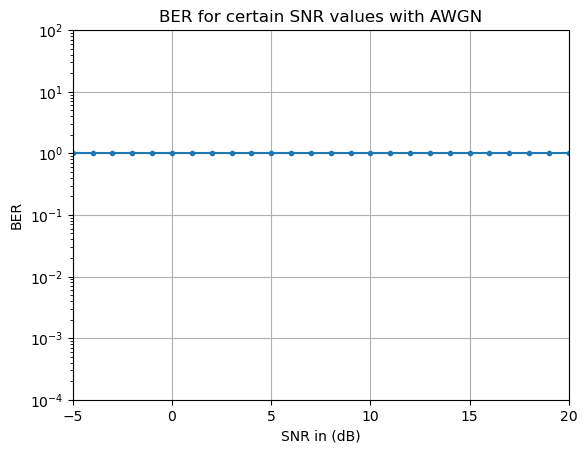

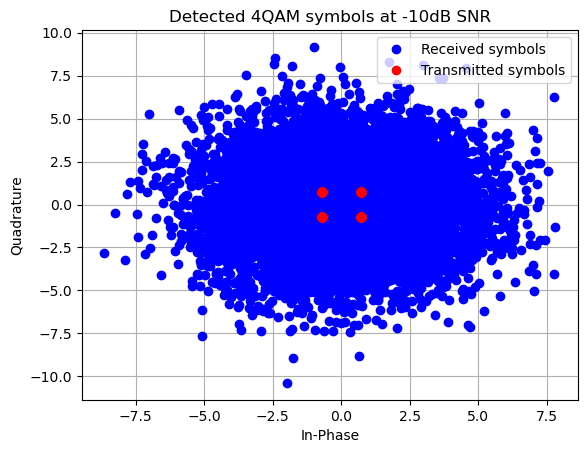

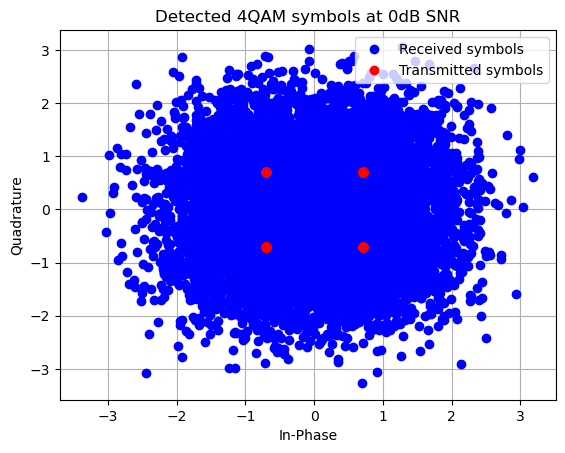

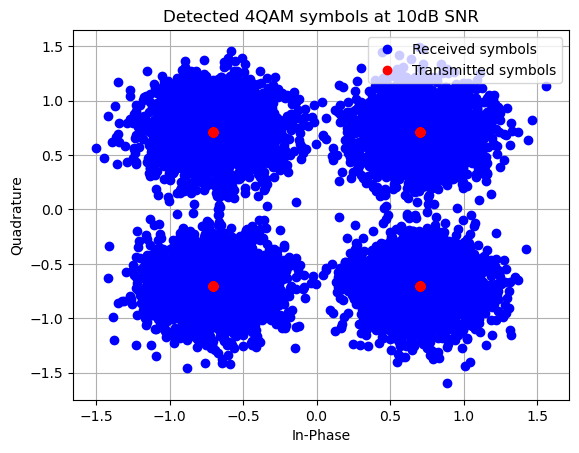

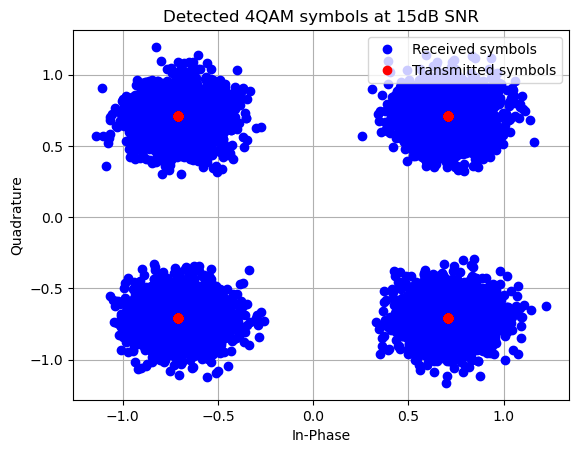

In [51]:
# plot BER
plt.semilogy(SNR, mean_BER[0], marker='.')
plt.grid(True)
plt.axis([-5, 20, 1e-4, 100])
plt.ylabel('BER')
plt.xlabel('SNR in (dB)')
plt.title('BER for certain SNR values with AWGN')
plt.show()

# plot constellation diagram for a given SNR
# SNR=-10dB
plt.figure()
plt.grid(True)
plt.plot(np.real(detected_symbols[0,]),np.imag(detected_symbols[0,]),'bo')
plt.plot(np.real(transmitted_symbols[0,]),np.imag(transmitted_symbols[0,]),'ro')
plt.ylabel('Quadrature')
plt.xlabel('In-Phase')
plt.title('Detected 4QAM symbols at -10dB SNR')
plt.legend(('Received symbols','Transmitted symbols'),loc='upper right')
plt.show()

# SNR=0dB
plt.figure()
plt.grid(True)
plt.plot(np.real(detected_symbols[10,]),np.imag(detected_symbols[10,]),'bo')
plt.plot(np.real(transmitted_symbols[10,]),np.imag(transmitted_symbols[10,]),'ro')
plt.ylabel('Quadrature')
plt.xlabel('In-Phase')
plt.title('Detected 4QAM symbols at 0dB SNR')
plt.legend(('Received symbols','Transmitted symbols'),loc='upper right')
plt.show()

# SNR=10dB
plt.figure()
plt.grid(True)
plt.plot(np.real(detected_symbols[20,]),np.imag(detected_symbols[20,]),'bo')
plt.plot(np.real(transmitted_symbols[20,]),np.imag(transmitted_symbols[20,]),'ro')
plt.ylabel('Quadrature')
plt.xlabel('In-Phase')
plt.title('Detected 4QAM symbols at 10dB SNR')
plt.legend(('Received symbols','Transmitted symbols'),loc='upper right')
plt.show()

# SNR=15dB
plt.figure()
plt.grid(True)
plt.plot(np.real(detected_symbols[25,]),np.imag(detected_symbols[25,]),'bo')
plt.plot(np.real(transmitted_symbols[25,]),np.imag(transmitted_symbols[25,]),'ro')
plt.ylabel('Quadrature')
plt.xlabel('In-Phase')
plt.title('Detected 4QAM symbols at 15dB SNR')
plt.legend(('Received symbols','Transmitted symbols'),loc='upper right')
plt.show()


**Provide an explanation for the first figure. What do you see? What is the influence of SNR? Link this figure to the obtained constellation diagrams.**

There is average of 0 dB BER or 1 BER. SNR doesnt influence BER by the looks off the figure although this isnt expected. I expected a decrease in BER when increase in SNR. Wast able to link it to the obtained constellation diagrams because of the constant plot. 

**What is the effect of Grey-coding on the BER compared to binary coding? Which option would you prefer and why?**
Grey-coding reduces the BER compared to binary coding by minimizing the impact of bit errors on symbol decoding, as adjacent symbols differ by only one bit. I would prefer Grey-coding for its error tolerance, which can improve system reliability, especially in high-noise environments.

**How do you expect the BER graph to change if M is taken larger or smaller and why?**

If M is taken larger, the BER graph is expected to worsen due to increased inter-symbol interference and noise susceptibility, while a smaller M would likely result in a lower BER as it allows for clearer distinction between symbols and better noise immunity.

**What are the advantages and disadvantages of choosing a larger or smaller M?**
The advantages of choosing a larger M include higher spectral efficiency and potentially higher data rates, but this comes with the drawback of increased susceptibility to noise and higher complexity in modulation and demodulation processes. Conversely, a smaller M offers better noise immunity and simpler implementation but at the expense of lower spectral efficiency and data rates